In [1]:
import pandas as pd
import numpy as np
from pymatgen.core import Composition
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.model_selection import train_test_split
import math
from joblib import Parallel, delayed
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import LeaveOneOut
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score
from tqdm import tqdm
import json
config = {
    "mathtext.fontset":'stix',
    "font.family":'serif',
    "font.serif": ['Arial'],
    "font.size": 24,
    'axes.unicode_minus': False 
}
plt.rcParams.update(config)
plt.rcParams['axes.unicode_minus'] = False  
large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (8, 6),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.rcParams['figure.dpi'] = 400
plt.rcParams['axes.grid'] = False

In [2]:
def get_combined_features(data: pd.DataFrame):
    columns = data.columns
    A_features = []
    B_features = []
    O_features = []
    for column in columns:
        if str(column).__contains__('A'):
            A_features.append(column)
        elif str(column).__contains__('B'):
            B_features.append(column)
        elif str(column).__contains__('O'):
            O_features.append(column)

    for a_feature, b_feature, o_feature in zip(A_features, B_features, O_features):
        feature_name = str(a_feature).split('_')[1]
        feature_name = feature_name
        data['A-B_'+feature_name] = np.abs(data[a_feature] - data[b_feature])
        data['(A+B)-O_'+feature_name] = np.abs((data[a_feature] + data[b_feature])- data[o_feature])


    data = data.drop(columns=O_features)
    return data

In [3]:
percentages = np.linspace(0.1, 1, 10)
r2_scores = []
mae_scores = []
rmse_scores = []
ABO3_r2_scores = []
ABO3_mae_scores = []
ABO3_rmse_scores = []

In [ ]:
all_features = pd.read_csv('/data/all_features_df.csv')
small_data = pd.read_csv('/data//single_perovskite_oxide.csv')
small_data = small_data.drop(columns = 'Unnamed: 0').reset_index(drop=True)
small_data = small_data.drop(columns = 'composition').reset_index(drop=True)
small_data['composition'] = small_data['formula'].map(Composition)
y_eg_abo3 = small_data['target']
re_data = pd.read_csv('/data/all_features_df.csv')
formulas_to_exclude = small_data['formula'].tolist()
atomic_features = pd.read_csv('/data/ao_features.csv')
pysic_features_ABO3 = pd.read_csv('/data/pysic_features_ABO3.csv').drop(columns = 'Unnamed: 0')
pysic_labels = pysic_features_ABO3.columns.drop('formula')

In [ ]:
ABO3_all_features = pd.read_csv('/data/ABO3_all_features.csv').drop(columns = 'Unnamed: 0')

In [7]:
pysic_features = re_data[pysic_labels]
pysic_features =  get_combined_features(pysic_features)
p_labels = pysic_features.columns

In [9]:
atomic_labels = atomic_features.columns
ec_labels = atomic_labels

In [10]:
from matminer.featurizers.base import MultipleFeaturizer
from matminer.featurizers import composition as cf
from pymatgen.core import Composition
feature_calculators = MultipleFeaturizer([cf.ElementProperty.from_preset("magpie"),
                                          cf.ValenceOrbital(props=['avg']), cf.IonProperty(fast=True)])
m_labels = feature_calculators.feature_labels()

In [11]:
y = re_data['Eg']
y

0        2.146025
1        1.374682
2        4.177025
3        3.941249
4        4.529786
           ...   
35320    3.843865
35321    3.431016
35322    2.085930
35323    3.646532
35324    3.178124
Name: Eg, Length: 35325, dtype: float64

In [12]:
base_seed = 42

In [13]:
X_train, X_test, y_train, y_test = train_test_split(all_features, y, test_size=0.2, random_state=42)

# magpie

In [ ]:
with open("/best_feature_set/best_feature_m.json", "r") as f:
    best_feature_m = json.load(f)
X_m_train = X_train[best_feature_m]
X_m_test = X_test[best_feature_m]

In [258]:
X_m_train

,MagpieData avg_dev MeltingT,MagpieData range Column,MagpieData mean Row,MagpieData avg_dev Row,MagpieData avg_dev NpValence,MagpieData maximum NdValence,MagpieData range NdValence,MagpieData minimum NValence,MagpieData mean NValence,MagpieData avg_dev NsUnfilled,...,MagpieData maximum NUnfilled,MagpieData mean GSvolume_pa,MagpieData avg_dev GSvolume_pa,MagpieData mean GSmagmom,MagpieData avg_dev GSmagmom,MagpieData maximum SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,avg d valence electrons,compound possible
6332,862.955312,15.0,3.26,1.5120,1.9200,4.0,4.0,1.0,4.86,0.4488,...,7.0,25.61555,22.786880,0.000000,0.000000,229.0,98.80,104.1600,0.80,False
5770,849.408000,14.0,3.60,1.9200,1.9200,2.0,2.0,2.0,8.02,0.0000,...,11.0,18.71290,11.529480,0.000000,0.000000,229.0,86.90,89.8800,0.40,False
22122,670.469760,13.0,3.36,1.6320,1.3824,10.0,10.0,6.0,9.32,0.0000,...,4.0,16.89780,9.844784,0.084427,0.162099,229.0,81.72,83.6640,1.84,True
33819,824.787672,13.0,3.48,1.7760,1.8480,10.0,10.0,4.0,8.54,0.0000,...,22.0,16.24805,8.571660,0.000000,0.000000,194.0,77.00,79.5600,1.14,False
21370,559.693440,13.0,3.12,1.3824,1.6096,10.0,10.0,3.0,7.24,0.0000,...,16.0,15.82780,8.067360,0.000000,0.000000,225.0,82.48,90.2144,0.60,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16850,540.350136,13.0,3.58,1.8960,1.4400,10.0,10.0,6.0,11.72,0.0000,...,4.0,17.30550,9.840600,0.000000,0.000000,225.0,89.32,92.7840,2.00,False
6265,433.636912,15.0,3.06,1.2720,1.4400,10.0,10.0,1.0,6.90,0.2408,...,10.0,24.85375,19.638000,0.000000,0.000000,229.0,95.90,100.6800,2.00,False
11284,702.096000,13.0,3.60,1.9200,1.9200,1.0,1.0,3.0,7.32,0.0000,...,9.0,18.71510,11.532120,0.000000,0.000000,194.0,84.80,87.3600,0.12,True
860,445.687200,13.0,3.20,1.4400,1.6800,10.0,10.0,5.0,8.00,0.0000,...,16.0,15.78950,8.021400,0.000000,0.000000,194.0,58.80,56.1600,2.16,True


In [67]:
ABO3_m = ABO3_all_features[best_feature_m]

In [62]:
r2_m_scores = []
mae_m_scores = []
rmse_m_scores = []

In [63]:
for idx, p in enumerate(percentages):

    n_samples = int(p * X_m_train.shape[0])
    
    np.random.seed(base_seed + idx)
    indices = np.random.choice(X_m_train.shape[0], n_samples, replace=False)
    X_sub = X_m_train.iloc[indices]
    y_sub = y_train.iloc[indices]
    
    model_m = ExtraTreesRegressor(n_jobs=-1,random_state=42)
    model_m.fit(X_sub, y_sub)
    
    y_pred = model_m.predict(X_m_test)
    r2_m_scores.append(r2_score(y_test, y_pred))
    mae_m_scores.append(mean_absolute_error(y_test, y_pred))
    rmse_m_scores.append(mean_squared_error(y_test, y_pred, squared=False))

In [64]:
y_pred_abo3 = model_m.predict(ABO3_m)
ABO3_r2_m_scores = r2_score(y_eg_abo3, y_pred_abo3)
ABO3_mae_m_scores = mean_absolute_error(y_eg_abo3, y_pred_abo3)
ABO3_rmse_m_scores = mean_squared_error(y_eg_abo3, y_pred_abo3, squared=False)

In [116]:
ABO3_rmse_m_scores

0.6230215328687347

# EC

In [ ]:
with open("/best_feature_set/best_feature_ec.json", "r") as f:
    best_feature_ec = json.load(f)
X_ec_train = X_train[best_feature_ec]
X_ec_test = X_test[best_feature_ec]

In [70]:
ABO3_ec = ABO3_all_features[best_feature_ec]

In [71]:
r2_ec_scores = []
mae_ec_scores = []
rmse_ec_scores = []

In [72]:
for idx, p in enumerate(percentages):

    n_samples = int(p * X_ec_train.shape[0])
    
    np.random.seed(base_seed + idx)
    indices = np.random.choice(X_ec_train.shape[0], n_samples, replace=False)
    X_sub = X_ec_train.iloc[indices]
    y_sub = y_train.iloc[indices]
    
    model_ec = ExtraTreesRegressor(n_jobs=-1,random_state=42)
    model_ec.fit(X_sub, y_sub)

    y_pred = model_ec.predict(X_ec_test)
    r2_ec_scores.append(r2_score(y_test, y_pred))
    mae_ec_scores.append(mean_absolute_error(y_test, y_pred))
    rmse_ec_scores.append(mean_squared_error(y_test, y_pred, squared=False))

In [73]:
y_pred_abo3 = model_ec.predict(ABO3_ec)
ABO3_r2_ec_scores = r2_score(y_eg_abo3, y_pred_abo3)
ABO3_mae_ec_scores = mean_absolute_error(y_eg_abo3, y_pred_abo3)
ABO3_rmse_ec_scores = mean_squared_error(y_eg_abo3, y_pred_abo3, squared=False)

# physic

In [ ]:
with open("/best_feature_set/best_feature_p.json", "r") as f:
    best_feature_p = json.load(f)
X_p_train = X_train[best_feature_p]
X_p_test = X_test[best_feature_p]

In [74]:
ABO3_p = ABO3_all_features[best_feature_p]

In [77]:
r2_p_scores = []
mae_p_scores = []
rmse_p_scores = []

In [78]:
for idx, p in enumerate(percentages):

    n_samples = int(p * X_p_train.shape[0])
    

    np.random.seed(base_seed + idx)
    indices = np.random.choice(X_p_train.shape[0], n_samples, replace=False)
    X_sub = X_p_train.iloc[indices]
    y_sub = y_train.iloc[indices]
    

    model_p = ExtraTreesRegressor(n_jobs=-1,random_state=42)
    model_p.fit(X_sub, y_sub)
    

    y_pred = model_p.predict(X_p_test)
    r2_p_scores.append(r2_score(y_test, y_pred))
    mae_p_scores.append(mean_absolute_error(y_test, y_pred))
    rmse_p_scores.append(mean_squared_error(y_test, y_pred, squared=False))

In [79]:
y_pred_abo3 = model_p.predict(ABO3_p)
ABO3_r2_p_scores = r2_score(y_eg_abo3, y_pred_abo3)
ABO3_mae_p_scores = mean_absolute_error(y_eg_abo3, y_pred_abo3)
ABO3_rmse_p_scores = mean_squared_error(y_eg_abo3, y_pred_abo3, squared=False)

# magpie + physic

In [ ]:
with open("/best_feature_set/best_feature_m_p.json", "r") as f:
    best_feature_m_p = json.load(f)
X_m_p_train = X_train[best_feature_m_p]
X_m_p_test = X_test[best_feature_m_p]

In [80]:
ABO3_m_p = ABO3_all_features[best_feature_m_p]

In [81]:
r2_m_p_scores = []
mae_m_p_scores = []
rmse_m_p_scores = []

In [82]:
for idx, p in enumerate(percentages):

    n_samples = int(p * X_m_p_train.shape[0])
    
  
    np.random.seed(base_seed + idx)
    indices = np.random.choice(X_m_p_train.shape[0], n_samples, replace=False)
    X_sub = X_m_p_train.iloc[indices]
    y_sub = y_train.iloc[indices]
    
  
    model_m_p = ExtraTreesRegressor(n_jobs=-1,random_state=42)
    model_m_p.fit(X_sub, y_sub)
    

    y_pred = model_m_p.predict(X_m_p_test)
    r2_m_p_scores.append(r2_score(y_test, y_pred))
    mae_m_p_scores.append(mean_absolute_error(y_test, y_pred))
    rmse_m_p_scores.append(mean_squared_error(y_test, y_pred, squared=False))

In [83]:
y_pred_abo3 = model_m_p.predict(ABO3_m_p)
ABO3_r2_m_p_scores = r2_score(y_eg_abo3, y_pred_abo3)
ABO3_mae_m_p_scores = mean_absolute_error(y_eg_abo3, y_pred_abo3)
ABO3_rmse_m_p_scores = mean_squared_error(y_eg_abo3, y_pred_abo3, squared=False)

# magpie + ec

In [ ]:
with open("/best_feature_set/best_feature_m_ec.json", "r") as f:
    best_feature_m_ec = json.load(f)
X_m_ec_train = X_train[best_feature_m_ec]
X_m_ec_test = X_test[best_feature_m_ec]

In [85]:
ABO3_m_ec = ABO3_all_features[best_feature_m_ec]

In [86]:
r2_m_ec_scores = []
mae_m_ec_scores = []
rmse_m_ec_scores = []

In [87]:
for idx, p in enumerate(percentages):

    n_samples = int(p * X_m_ec_train.shape[0])

    np.random.seed(base_seed + idx)
    indices = np.random.choice(X_m_ec_train.shape[0], n_samples, replace=False)
    X_sub = X_m_ec_train.iloc[indices]
    y_sub = y_train.iloc[indices]
    

    model_m_ec = ExtraTreesRegressor(n_jobs=-1,random_state=42)
    model_m_ec.fit(X_sub, y_sub)

    y_pred = model_m_ec.predict(X_m_ec_test)
    r2_m_ec_scores.append(r2_score(y_test, y_pred))
    mae_m_ec_scores.append(mean_absolute_error(y_test, y_pred))
    rmse_m_ec_scores.append(mean_squared_error(y_test, y_pred, squared=False))

In [88]:
y_pred_abo3 = model_m_ec.predict(ABO3_m_ec)
ABO3_r2_m_ec_scores = r2_score(y_eg_abo3, y_pred_abo3)
ABO3_mae_m_ec_scores = mean_absolute_error(y_eg_abo3, y_pred_abo3)
ABO3_rmse_m_ec_scores = mean_squared_error(y_eg_abo3, y_pred_abo3, squared=False)

# EC+physic

In [ ]:
with open("/best_feature_set/best_feature_ec_p.json", "r") as f:
    best_feature_p_ec = json.load(f)
X_p_ec_train = X_train[best_feature_p_ec]
X_p_ec_test = X_test[best_feature_p_ec]

In [90]:
ABO3_p_ec = ABO3_all_features[best_feature_p_ec]

In [91]:
r2_p_ec_scores = []
mae_p_ec_scores = []
rmse_p_ec_scores = []

In [92]:
for idx, p in enumerate(percentages):

    n_samples = int(p * X_p_ec_train.shape[0])
    

    np.random.seed(base_seed + idx)
    indices = np.random.choice(X_p_ec_train.shape[0], n_samples, replace=False)
    X_sub = X_p_ec_train.iloc[indices]
    y_sub = y_train.iloc[indices]
    

    model_p_ec = ExtraTreesRegressor(n_jobs=-1,random_state=42)
    model_p_ec.fit(X_sub, y_sub)

    y_pred = model_p_ec.predict(X_p_ec_test)
    r2_p_ec_scores.append(r2_score(y_test, y_pred))
    mae_p_ec_scores.append(mean_absolute_error(y_test, y_pred))
    rmse_p_ec_scores.append(mean_squared_error(y_test, y_pred, squared=False))

In [93]:
y_pred_abo3 = model_p_ec.predict(ABO3_p_ec)
ABO3_r2_p_ec_scores = r2_score(y_eg_abo3, y_pred_abo3)
ABO3_mae_p_ec_scores = mean_absolute_error(y_eg_abo3, y_pred_abo3)
ABO3_rmse_p_ec_scores = mean_squared_error(y_eg_abo3, y_pred_abo3, squared=False)

# magpie+physic+EC

In [ ]:
with open("/best_feature_set/best_feature_m_p_ec.json", "r") as f:
    best_feature_m_p_ec = json.load(f)
X_m_p_ec_train = X_train[best_feature_m_p_ec]
X_m_p_ec_test = X_test[best_feature_m_p_ec]

In [96]:
ABO3_m_p_ec = ABO3_all_features[best_feature_m_p_ec]

In [97]:
r2_m_p_ec_scores = []
mae_m_p_ec_scores = []
rmse_m_p_ec_scores = []

In [98]:
for idx, p in enumerate(percentages):

    n_samples = int(p * X_m_p_ec_train.shape[0])
    

    np.random.seed(base_seed + idx)
    indices = np.random.choice(X_m_p_ec_train.shape[0], n_samples, replace=False)
    X_sub = X_m_p_ec_train.iloc[indices]
    y_sub = y_train.iloc[indices]
    

    model_m_p_ec = ExtraTreesRegressor(n_jobs=-1,random_state=42)
    model_m_p_ec.fit(X_sub, y_sub)

    y_pred = model_m_p_ec.predict(X_m_p_ec_test)
    r2_m_p_ec_scores.append(r2_score(y_test, y_pred))
    mae_m_p_ec_scores.append(mean_absolute_error(y_test, y_pred))
    rmse_m_p_ec_scores.append(mean_squared_error(y_test, y_pred, squared=False))

In [99]:
y_pred_abo3 = model_m_p_ec.predict(ABO3_m_p_ec)
ABO3_r2_m_p_ec_scores = r2_score(y_eg_abo3, y_pred_abo3)
ABO3_mae_m_p_ec_scores = mean_absolute_error(y_eg_abo3, y_pred_abo3)
ABO3_rmse_m_p_ec_scores = mean_squared_error(y_eg_abo3, y_pred_abo3, squared=False)

# plot

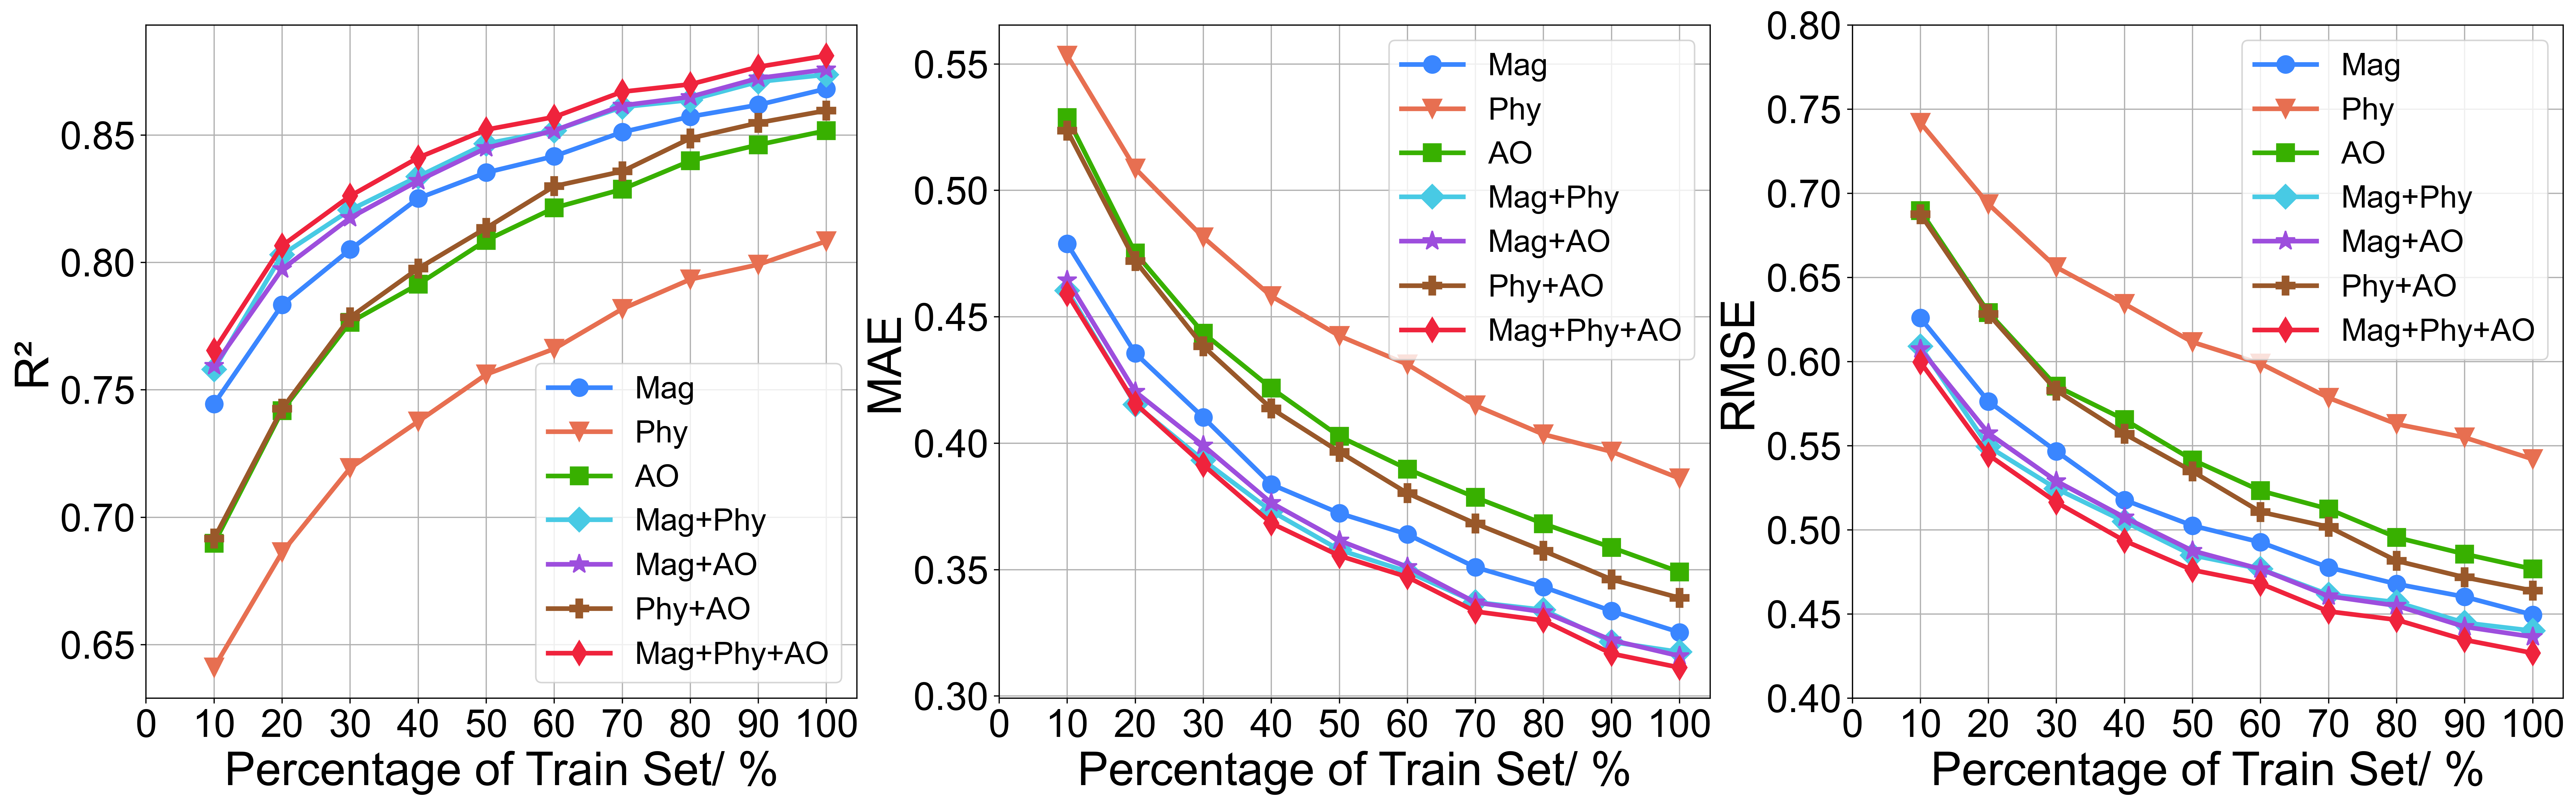

In [302]:
plt.figure(figsize=(28, 8))

# R2
plt.subplot(1,3,1)
plt.plot(percentages * 100, r2_m_scores, marker='o', markersize=11, linewidth=3, color='#3A86FF', label='Mag')
plt.plot(percentages * 100, r2_p_scores, marker='v', markersize=12, linewidth=3, color='#e76f51', label='Phy')
plt.plot(percentages * 100, r2_ec_scores, marker='s',markersize=11, linewidth=3, color='#38b000', label='AO')
plt.plot(percentages * 100, r2_m_p_scores, marker='D',markersize=11, linewidth=3, color='#48cae4', label='Mag+Phy')
plt.plot(percentages * 100, r2_m_ec_scores, marker='*',markersize=13, linewidth=3, color='#9d4edd', label='Mag+AO')
plt.plot(percentages * 100, r2_p_ec_scores, marker='P',markersize=12, linewidth=3, color='#99582a', label='Phy+AO')
plt.plot(percentages * 100, r2_m_p_ec_scores, marker='d',markersize=11, linewidth=3, color='#ef233c', label='Mag+Phy+AO')
plt.xlabel('Percentage of Train Set/ %',fontsize = 30)
plt.ylabel('R²',fontsize = 30)
plt.xticks(range(0, 110, 10),fontsize = 25)
plt.yticks(fontsize = 25)
plt.grid(True)
plt.legend(loc='lower right', fontsize = 20)

# MAE
plt.subplot(1,3,2)
plt.plot(percentages * 100, mae_m_scores, marker='o',markersize=11, linewidth=3, color='#3A86FF', label='Mag')
plt.plot(percentages * 100, mae_p_scores, marker='v',markersize=12, linewidth=3, color='#e76f51', label='Phy')
plt.plot(percentages * 100, mae_ec_scores, marker='s',markersize=11, linewidth=3, color='#38b000', label='AO')
plt.plot(percentages * 100, mae_m_p_scores, marker='D',markersize=11, linewidth=3, color='#48cae4', label='Mag+Phy')
plt.plot(percentages * 100, mae_m_ec_scores, marker='*',markersize=13, linewidth=3, color='#9d4edd', label='Mag+AO')
plt.plot(percentages * 100, mae_p_ec_scores, marker='P',markersize=12, linewidth=3, color='#99582a', label='Phy+AO')
plt.plot(percentages * 100, mae_m_p_ec_scores, marker='d',markersize=11, linewidth=3, color='#ef233c', label='Mag+Phy+AO')
plt.xlabel('Percentage of Train Set/ %',fontsize = 30)
plt.ylabel('MAE',fontsize = 30)
plt.xticks(range(0, 110, 10),fontsize = 25)
plt.yticks(fontsize = 25)
plt.grid(True)
plt.legend(loc='upper right', fontsize = 20)

# RMSE
plt.subplot(1,3,3)
plt.plot(percentages * 100, rmse_m_scores, marker='o',markersize=11, linewidth=3, color='#3A86FF', label='Mag')
plt.plot(percentages * 100, rmse_p_scores, marker='v',markersize=12, linewidth=3, color='#e76f51', label='Phy')
plt.plot(percentages * 100, rmse_ec_scores, marker='s',markersize=11, linewidth=3, color='#38b000', label='AO')
plt.plot(percentages * 100, rmse_m_p_scores, marker='D',markersize=11, linewidth=3, color='#48cae4', label='Mag+Phy')
plt.plot(percentages * 100, rmse_m_ec_scores, marker='*',markersize=13, linewidth=3, color='#9d4edd', label='Mag+AO')
plt.plot(percentages * 100, rmse_p_ec_scores, marker='P',markersize=12, linewidth=3, color='#99582a', label='Phy+AO')
plt.plot(percentages * 100, rmse_m_p_ec_scores, marker='d',markersize=11, linewidth=3, color='#ef233c', label='Mag+Phy+AO')
plt.ylim(0.4,0.8)
plt.xlabel('Percentage of Train Set/ %',fontsize = 30)
plt.ylabel('RMSE',fontsize = 30)
plt.xticks(range(0, 110, 10),fontsize = 25)
plt.yticks(fontsize = 25)
plt.grid(True)
plt.legend(loc='upper right',fontsize = 20)

plt.savefig('test7.png',format = 'png',dpi=400, bbox_inches='tight')
plt.show()

# bar plot of valid set

In [117]:
ABO3_r2_scores = [ABO3_r2_m_scores,ABO3_r2_p_scores,ABO3_r2_ec_scores,ABO3_r2_m_p_scores,
                  ABO3_r2_m_ec_scores,ABO3_r2_p_ec_scores,ABO3_r2_m_p_ec_scores]
ABO3_mae_scores = [ABO3_mae_m_scores,ABO3_mae_p_scores,ABO3_mae_ec_scores,ABO3_mae_m_p_scores,
                  ABO3_mae_m_ec_scores,ABO3_mae_p_ec_scores,ABO3_mae_m_p_ec_scores]
ABO3_rmse_scores = [ABO3_rmse_m_scores,ABO3_rmse_p_scores,ABO3_rmse_ec_scores,ABO3_rmse_m_p_scores,
                  ABO3_rmse_m_ec_scores,ABO3_rmse_p_ec_scores,ABO3_rmse_m_p_ec_scores]

In [300]:
f_etr = ['Mag','Phy','AO','Mag+Phy','Mag+AO','Phy+AO','Mag+Phy+AO']
colors = ['#23d690','#00c39d','#00aea8','#0098ac','#0082ab','#006ca2','#004f6f']
labels = ['R²','MAE','RMSE']
x = np.arange(len(labels)) 
width = 0.09  

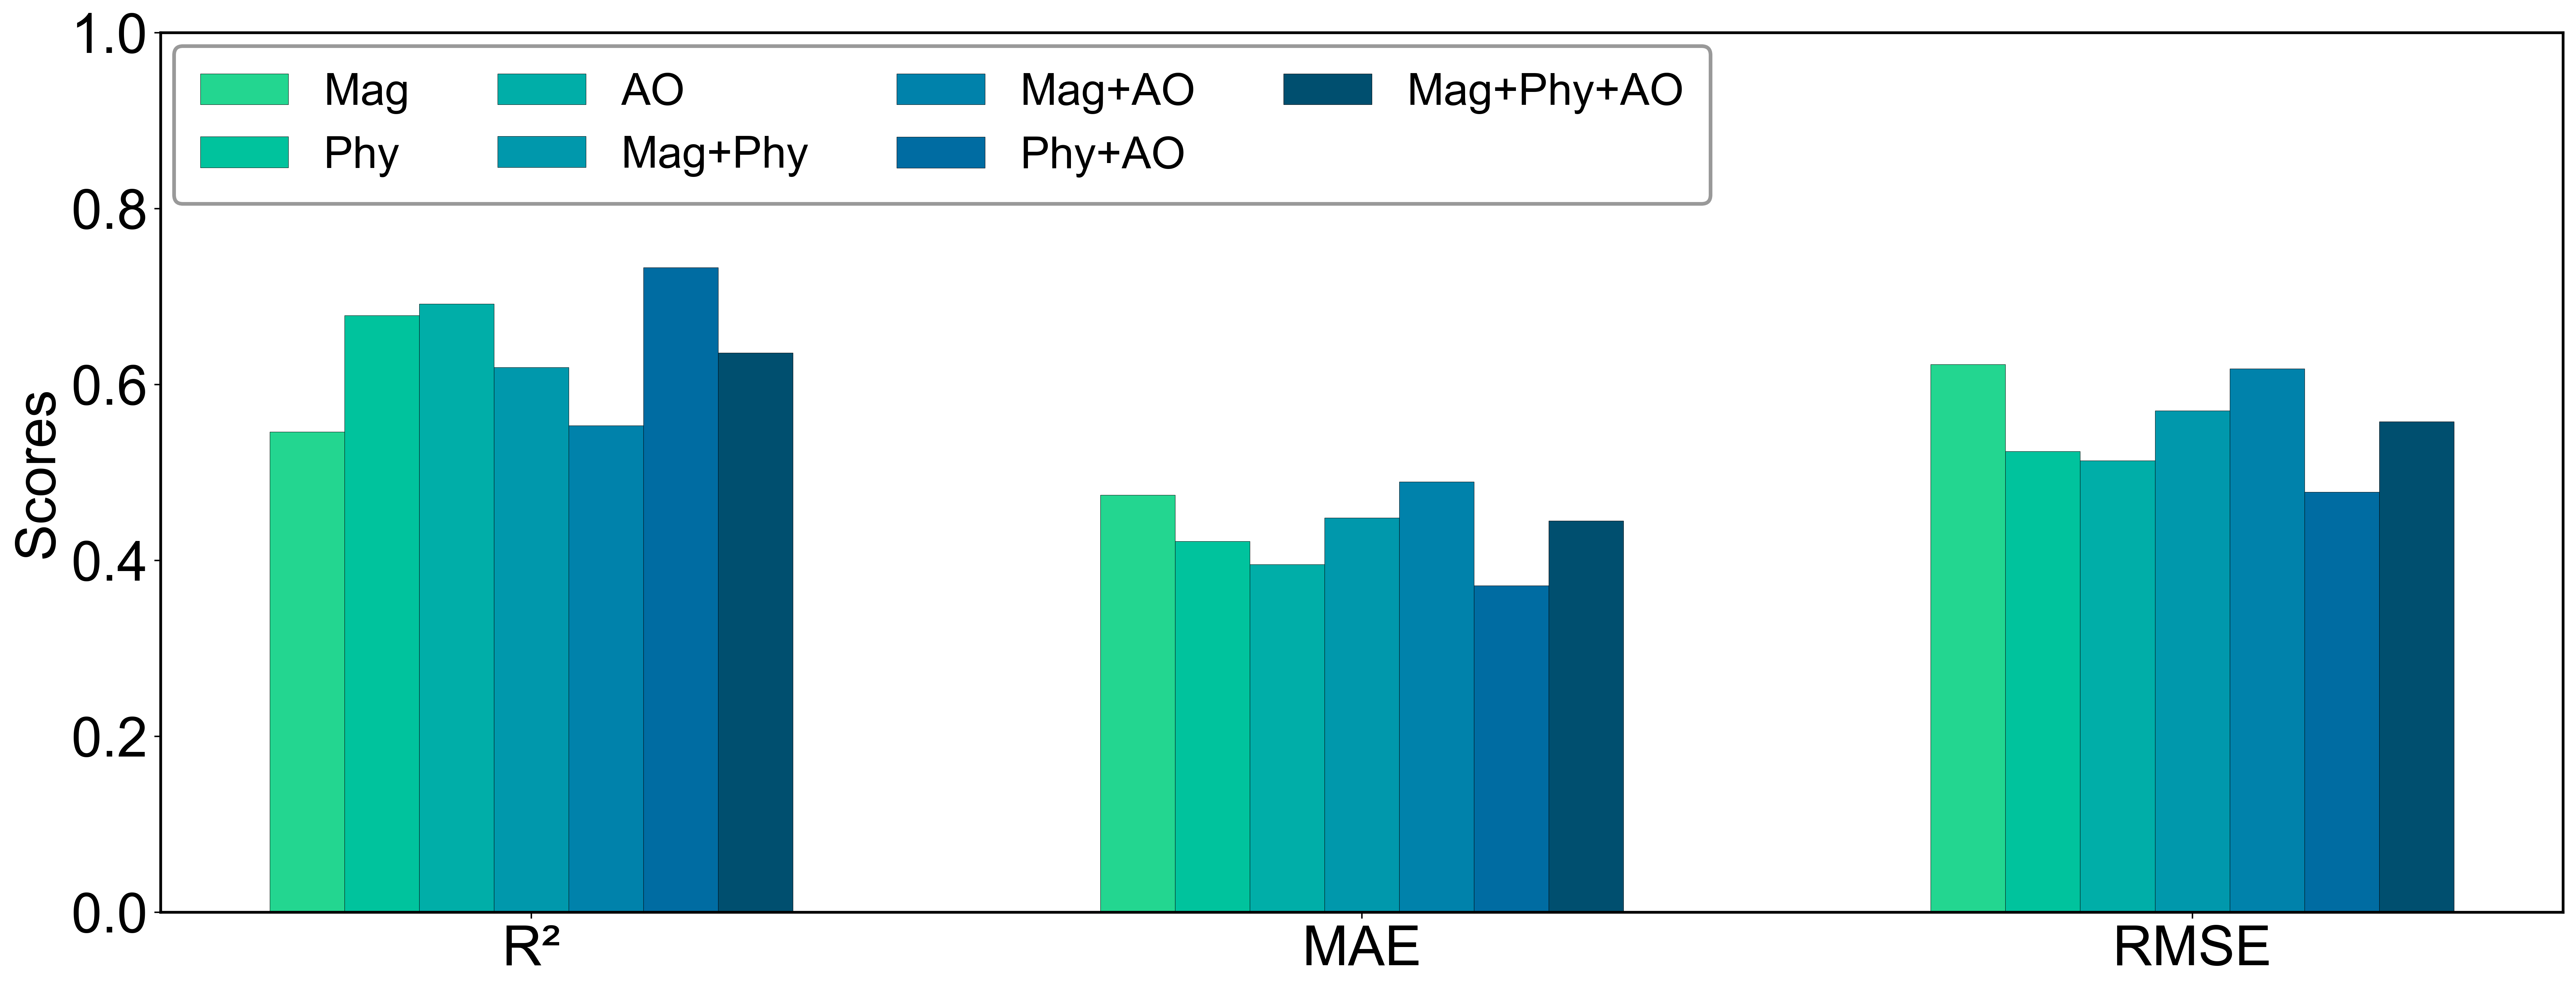

In [301]:
fig, ax = plt.subplots(figsize=(20, 8))


for i, f in enumerate(f_etr):
    offsets = width * (i - len(f_etr)/2 + 0.5)  
    values = [ABO3_r2_scores[i], ABO3_mae_scores[i], ABO3_rmse_scores[i]]
    ax.bar(x + offsets, values, width, label=f, color=colors[i],edgecolor='black', linewidth=0.2)

ax.set_ylim(0, 1)
plt.xticks(x,fontsize = 25)
plt.yticks(fontsize = 30)
ax.set_xticklabels(labels,fontsize = 30)
ax.set_ylabel('Scores',fontsize=30)
leg = ax.legend(loc='upper left',ncol=len(f_etr)-3,fancybox = True,fontsize = 24, edgecolor='gray')  
leg.get_frame().set_linewidth(2)  
leg.get_frame().set_boxstyle('Round, pad=0.2')                                 
for spine in ax.spines.values():
    spine.set_linewidth(1.5)  

plt.tight_layout()
plt.savefig('valid7.png',format = 'png',dpi=400, bbox_inches='tight')
plt.show()